# Visualization Tutorial 4: Model Evaluation Plots

This tutorial demonstrates how to create comprehensive model evaluation visualizations using the `braintools.visualize` module. We'll cover:

1. Confusion matrices for classification tasks
2. ROC curves and AUC analysis
3. Precision-recall curves
4. Learning curves for model training
5. Performance comparison across different models
6. Statistical significance testing visualization

Let's start by importing the necessary modules and generating sample data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC

# Import braintools visualization functions
import braintools

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

## 1. Generate Sample Data

First, let's create synthetic datasets for classification and regression tasks.

In [2]:
# Generate binary classification dataset
X_binary, y_binary = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=10,
    n_clusters_per_class=1,
    random_state=42
)

# Generate multiclass classification dataset
X_multi, y_multi = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=10,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=42
)

# Split datasets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42
)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)

print(f"Binary classification dataset: {X_binary.shape}")
print(f"Multiclass classification dataset: {X_multi.shape}")
print(f"Binary classes: {np.unique(y_binary)}")
print(f"Multiclass classes: {np.unique(y_multi)}")

Binary classification dataset: (1000, 20)
Multiclass classification dataset: (1000, 20)
Binary classes: [0 1]
Multiclass classes: [0 1 2]


## 2. Confusion Matrices for Classification Tasks

Confusion matrices provide a detailed breakdown of correct and incorrect predictions for each class.

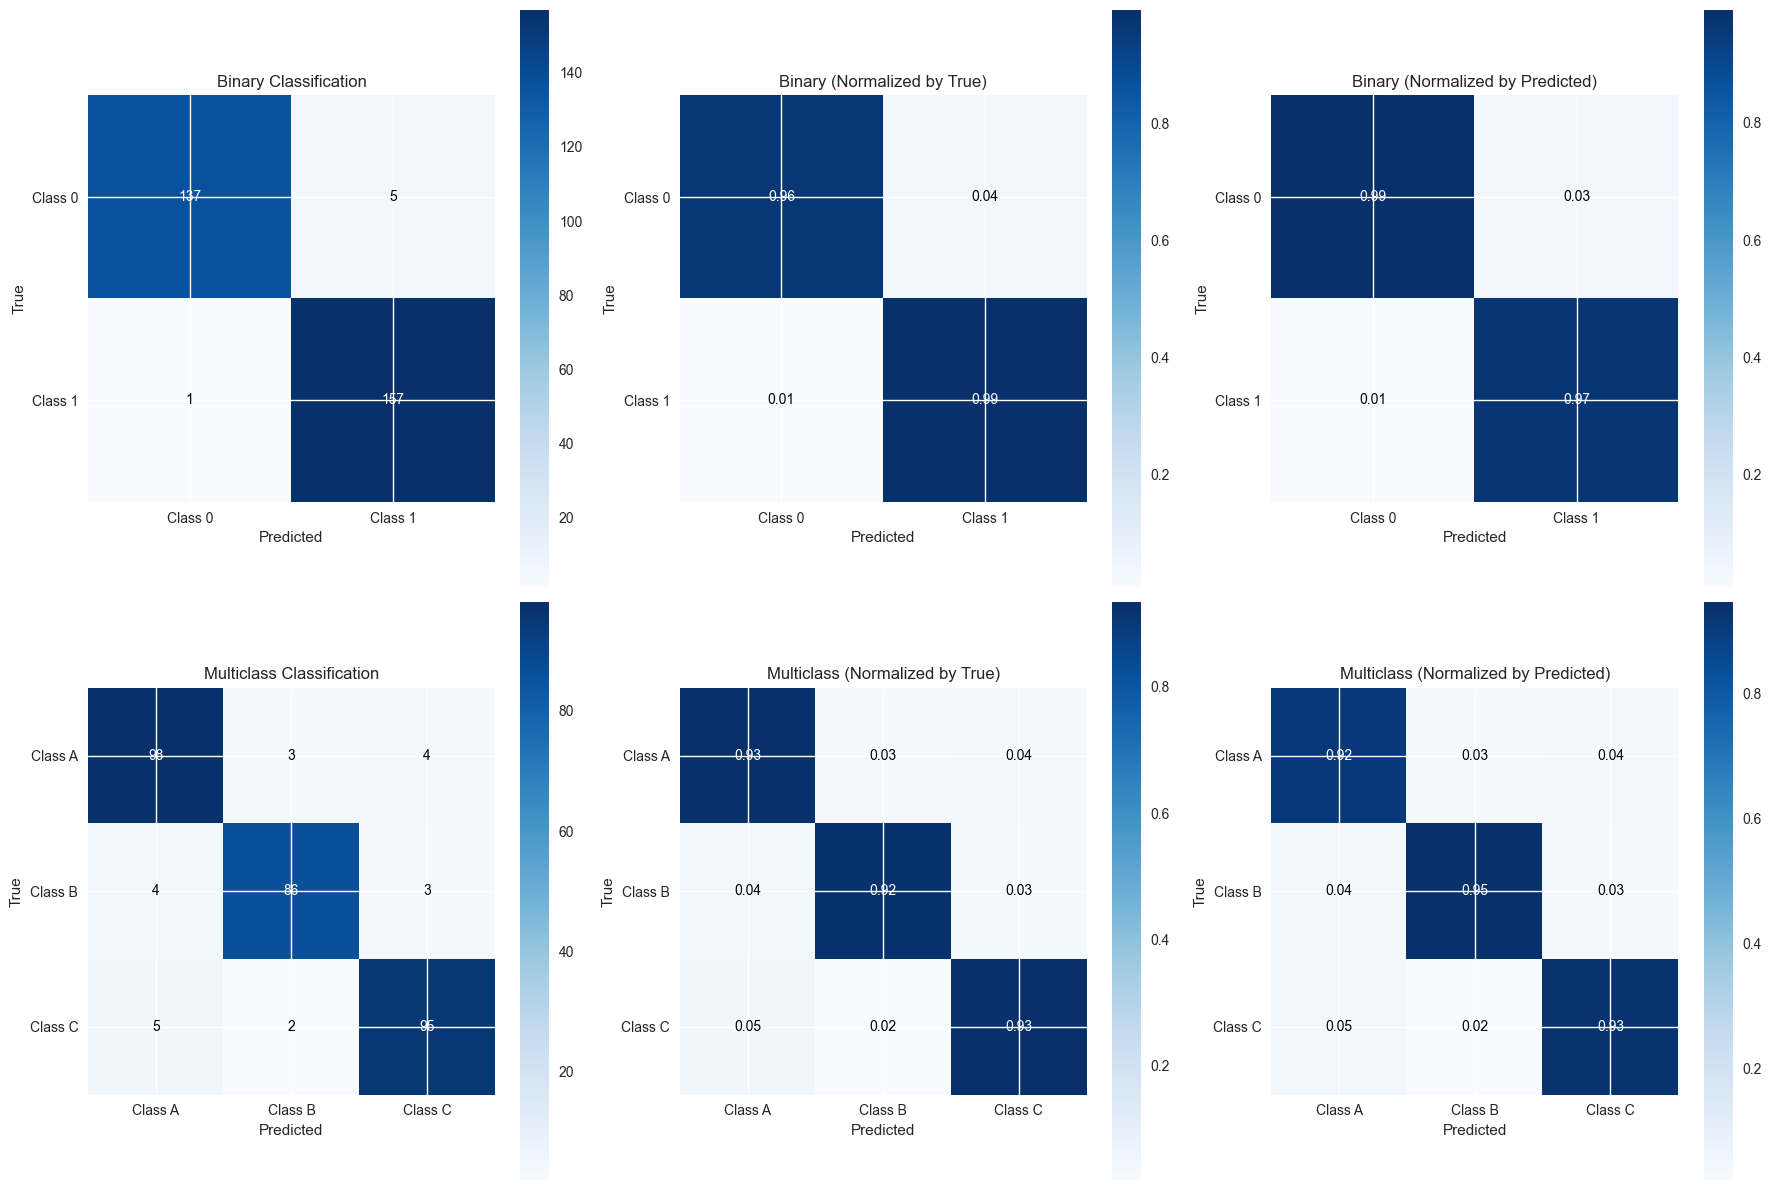

In [3]:
# Train classifiers
clf_binary = RandomForestClassifier(n_estimators=100, random_state=42)
clf_binary.fit(X_train_bin, y_train_bin)
y_pred_bin = clf_binary.predict(X_test_bin)

clf_multi = RandomForestClassifier(n_estimators=100, random_state=42)
clf_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = clf_multi.predict(X_test_multi)

# Create confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Binary classification confusion matrices
braintools.visualize.confusion_matrix(y_test_bin,
                                      y_pred_bin,
                                      ax=axes[0, 0],
                                      labels=['Class 0', 'Class 1'],
                                      title='Binary Classification')

braintools.visualize.confusion_matrix(y_test_bin,
                                      y_pred_bin,
                                      ax=axes[0, 1],
                                      normalize='true',
                                      labels=['Class 0', 'Class 1'],
                                      title='Binary (Normalized by True)')

braintools.visualize.confusion_matrix(y_test_bin,
                                      y_pred_bin,
                                      ax=axes[0, 2],
                                      normalize='pred',
                                      labels=['Class 0', 'Class 1'],
                                      title='Binary (Normalized by Predicted)')

# Multiclass classification confusion matrices
braintools.visualize.confusion_matrix(y_test_multi,
                                      y_pred_multi,
                                      ax=axes[1, 0],
                                      labels=['Class A', 'Class B', 'Class C'],
                                      title='Multiclass Classification')

braintools.visualize.confusion_matrix(y_test_multi,
                                      y_pred_multi,
                                      ax=axes[1, 1],
                                      normalize='true',
                                      labels=['Class A', 'Class B', 'Class C'],
                                      title='Multiclass (Normalized by True)')

braintools.visualize.confusion_matrix(y_test_multi,
                                      y_pred_multi,
                                      ax=axes[1, 2],
                                      normalize='pred',
                                      labels=['Class A', 'Class B', 'Class C'],
                                      title='Multiclass (Normalized by Predicted)')

plt.tight_layout()
plt.show()

## 3. ROC Curves and AUC Analysis

ROC curves show the trade-off between sensitivity (true positive rate) and specificity (false positive rate) at various threshold settings.

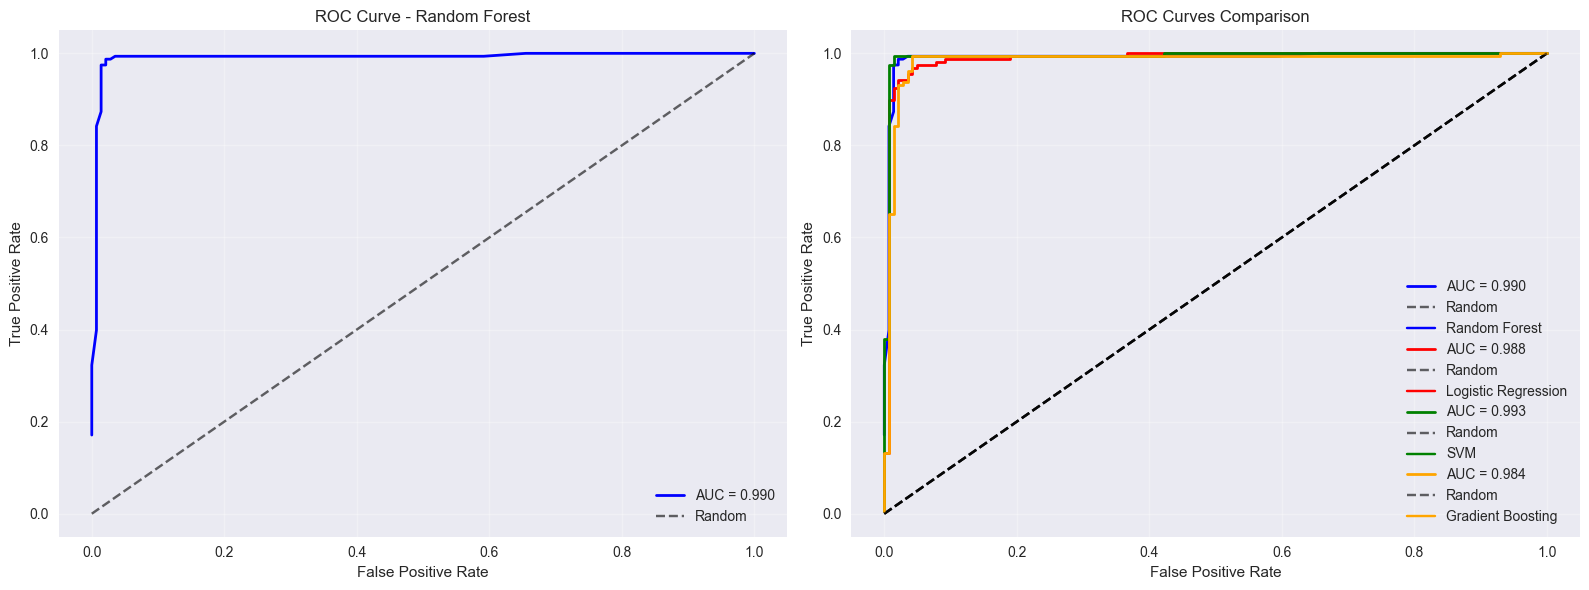

In [4]:
# Get probability predictions for binary classification
y_scores_bin = clf_binary.predict_proba(X_test_bin)[:, 1]

# Train multiple models for comparison
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Single ROC curve
braintools.visualize.roc_curve(y_test_bin,
                               y_scores_bin,
                               ax=axes[0],
                               color='blue',
                               title='ROC Curve - Random Forest')

# Multiple ROC curves for model comparison
colors = ['blue', 'red', 'green', 'orange']
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_bin, y_train_bin)
    y_scores = model.predict_proba(X_test_bin)[:, 1]
    braintools.visualize.roc_curve(y_test_bin,
                                   y_scores,
                                   ax=axes[1],
                                   color=colors[i],
                                   title='ROC Curves Comparison')
    # Add model name to legend by plotting invisible line
    axes[1].plot([], [], color=colors[i], label=name)

axes[1].legend()
plt.tight_layout()
plt.show()

## 4. Precision-Recall Curves

Precision-recall curves are particularly useful when dealing with imbalanced datasets.

Imbalanced dataset class distribution:
Class 0: 897 (89.7%)
Class 1: 103 (10.3%)


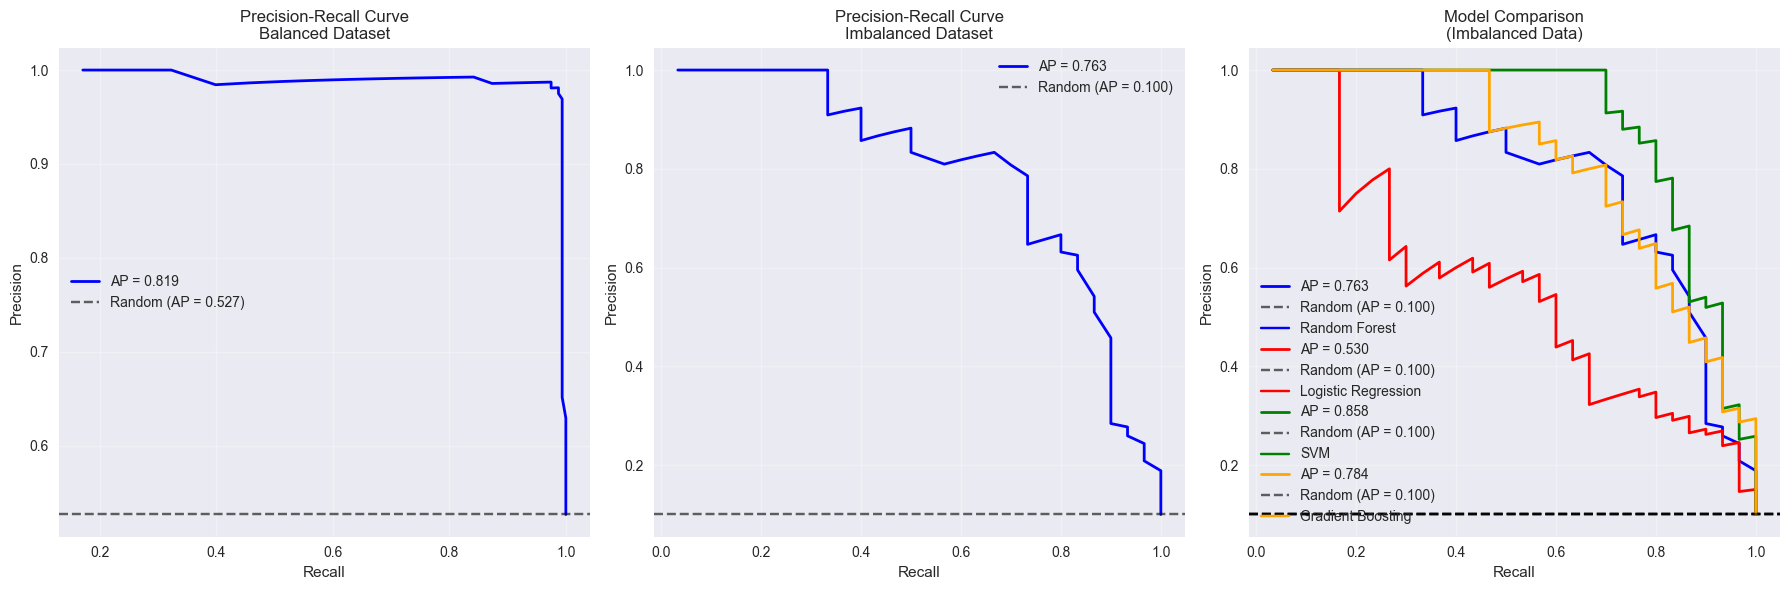

In [5]:
# Create imbalanced dataset
X_imbal, y_imbal = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=10,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    flip_y=0.01,
    random_state=42
)

X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal = train_test_split(
    X_imbal, y_imbal, test_size=0.3, random_state=42
)

print(f"Imbalanced dataset class distribution:")
print(f"Class 0: {np.sum(y_imbal == 0)} ({np.mean(y_imbal == 0):.1%})")
print(f"Class 1: {np.sum(y_imbal == 1)} ({np.mean(y_imbal == 1):.1%})")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Compare balanced vs imbalanced datasets
datasets = [
    (X_test_bin, y_test_bin, y_scores_bin, 'Balanced Dataset'),
    (X_test_imbal, y_test_imbal, None, 'Imbalanced Dataset'),
]

for i, (X_test, y_test, y_scores, title) in enumerate(datasets):
    if y_scores is None:
        # Train model on imbalanced data
        clf_imbal = RandomForestClassifier(n_estimators=100, random_state=42)
        clf_imbal.fit(X_train_imbal, y_train_imbal)
        y_scores = clf_imbal.predict_proba(X_test)[:, 1]

    braintools.visualize.precision_recall_curve(y_test,
                                                y_scores,
                                                ax=axes[i],
                                                title=f'Precision-Recall Curve\n{title}')

# Model comparison on imbalanced data
colors = ['blue', 'red', 'green', 'orange']
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_imbal, y_train_imbal)
    y_scores = model.predict_proba(X_test_imbal)[:, 1]
    braintools.visualize.precision_recall_curve(y_test_imbal,
                                                y_scores,
                                                ax=axes[2],
                                                color=colors[i],
                                                title='Model Comparison\n(Imbalanced Data)')
    axes[2].plot([], [], color=colors[i], label=name)

axes[2].legend()
plt.tight_layout()
plt.show()

## 5. Learning Curves for Model Training

Learning curves help diagnose bias and variance in model performance by showing how performance changes with training set size.

Generating learning curve for Random Forest...
Generating learning curve for Logistic Regression...
Generating learning curve for SVM...


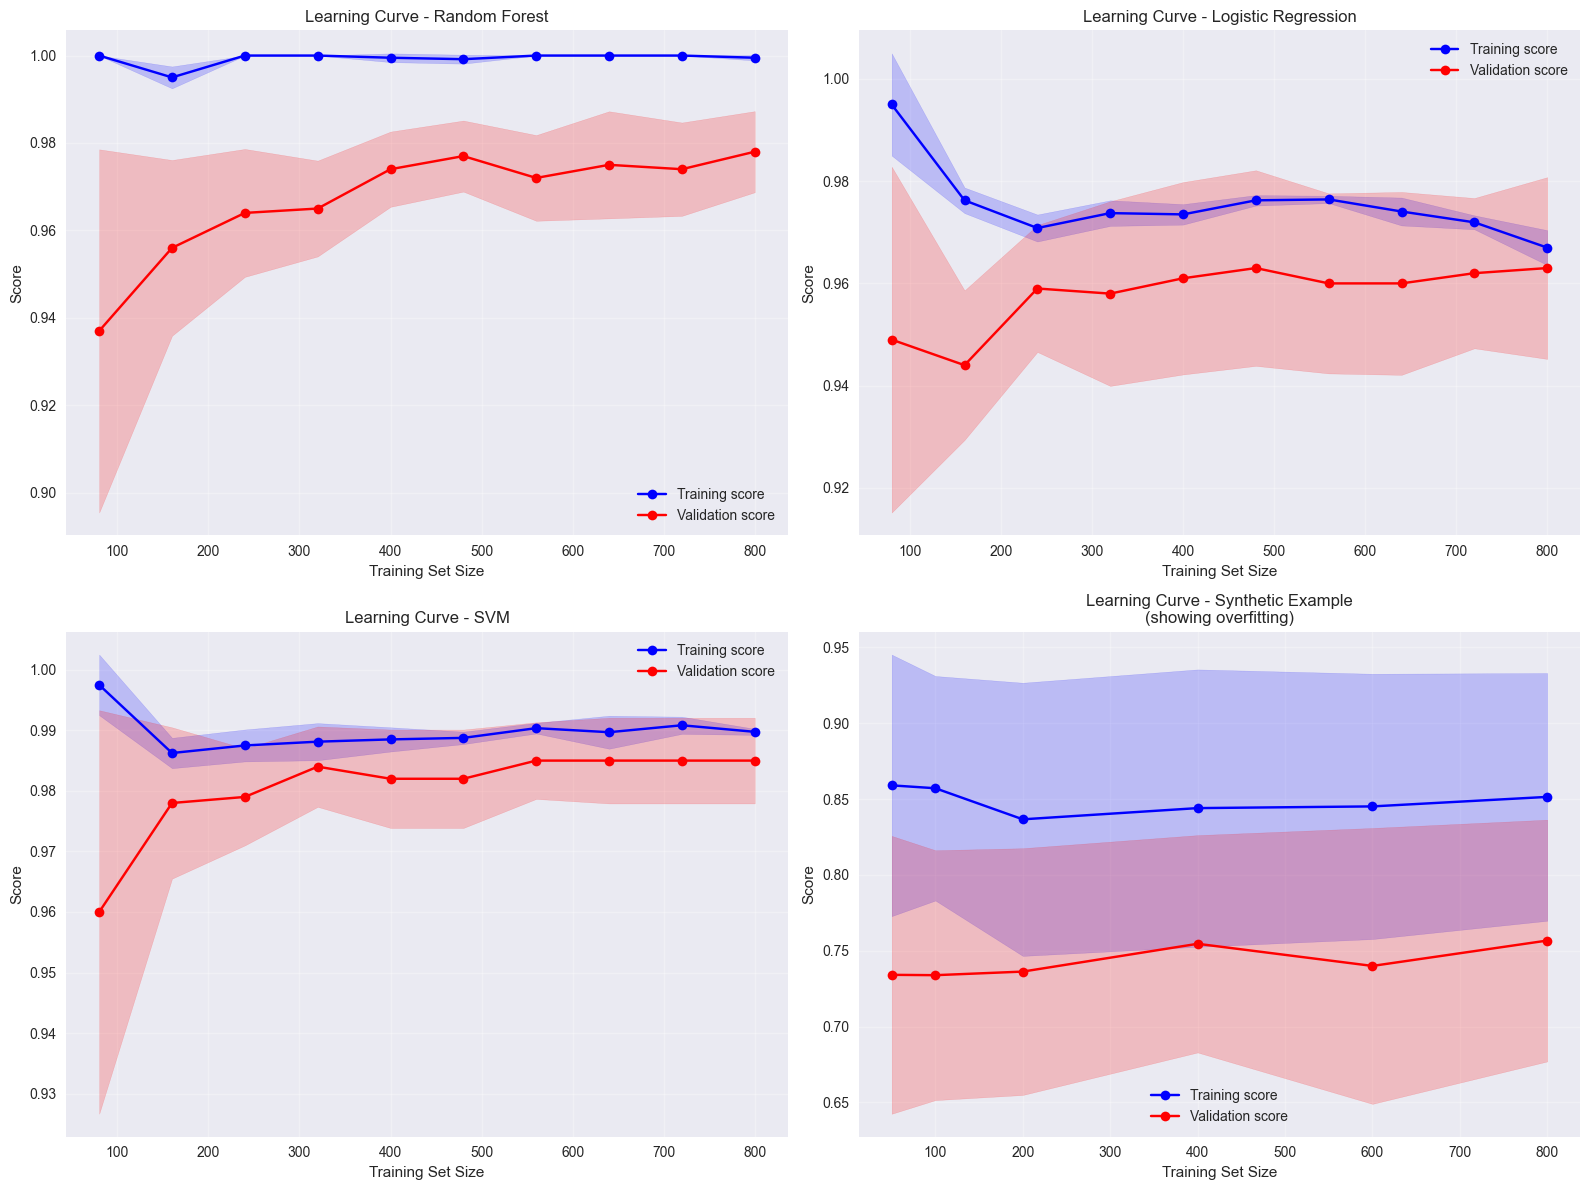

In [6]:
# Generate learning curves for different models
def generate_learning_curve_data(model, X, y, cv=5):
    """Generate learning curve data using sklearn's learning_curve function."""
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=cv,
        scoring='accuracy', random_state=42, n_jobs=-1
    )
    return train_sizes_abs, train_scores, val_scores


# Models to compare
learning_models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Generate learning curves for each model
for i, (name, model) in enumerate(learning_models.items()):
    print(f"Generating learning curve for {name}...")
    train_sizes_abs, train_scores, val_scores = generate_learning_curve_data(
        model, X_binary, y_binary
    )

    braintools.visualize.learning_curve(train_sizes_abs,
                                        train_scores,
                                        val_scores,
                                        ax=axes[i],
                                        title=f'Learning Curve - {name}')

# Example with synthetic learning curve data for demonstration
np.random.seed(42)
train_sizes = np.array([50, 100, 200, 400, 600, 800])
# Simulate realistic learning curves
train_scores_mean = 0.95 - 0.3 * np.exp(-train_sizes / 200)  # Training score improves quickly
val_scores_mean = 0.6 + 0.25 * (1 - np.exp(-train_sizes / 300))  # Validation score improves more slowly

# Add some noise
n_len = len(train_scores_mean)
train_scores = train_scores_mean + np.random.normal(0, 0.02, size=(len(train_sizes), n_len))
val_scores = val_scores_mean + np.random.normal(0, 0.03, size=(len(train_sizes), n_len))

braintools.visualize.learning_curve(train_sizes,
                                    train_scores,
                                    val_scores,
                                    ax=axes[3],
                                    title='Learning Curve - Synthetic Example\n(showing overfitting)')

plt.tight_layout()
plt.show()

## 6. Performance Comparison Across Different Models

Let's create comprehensive performance comparison visualizations.

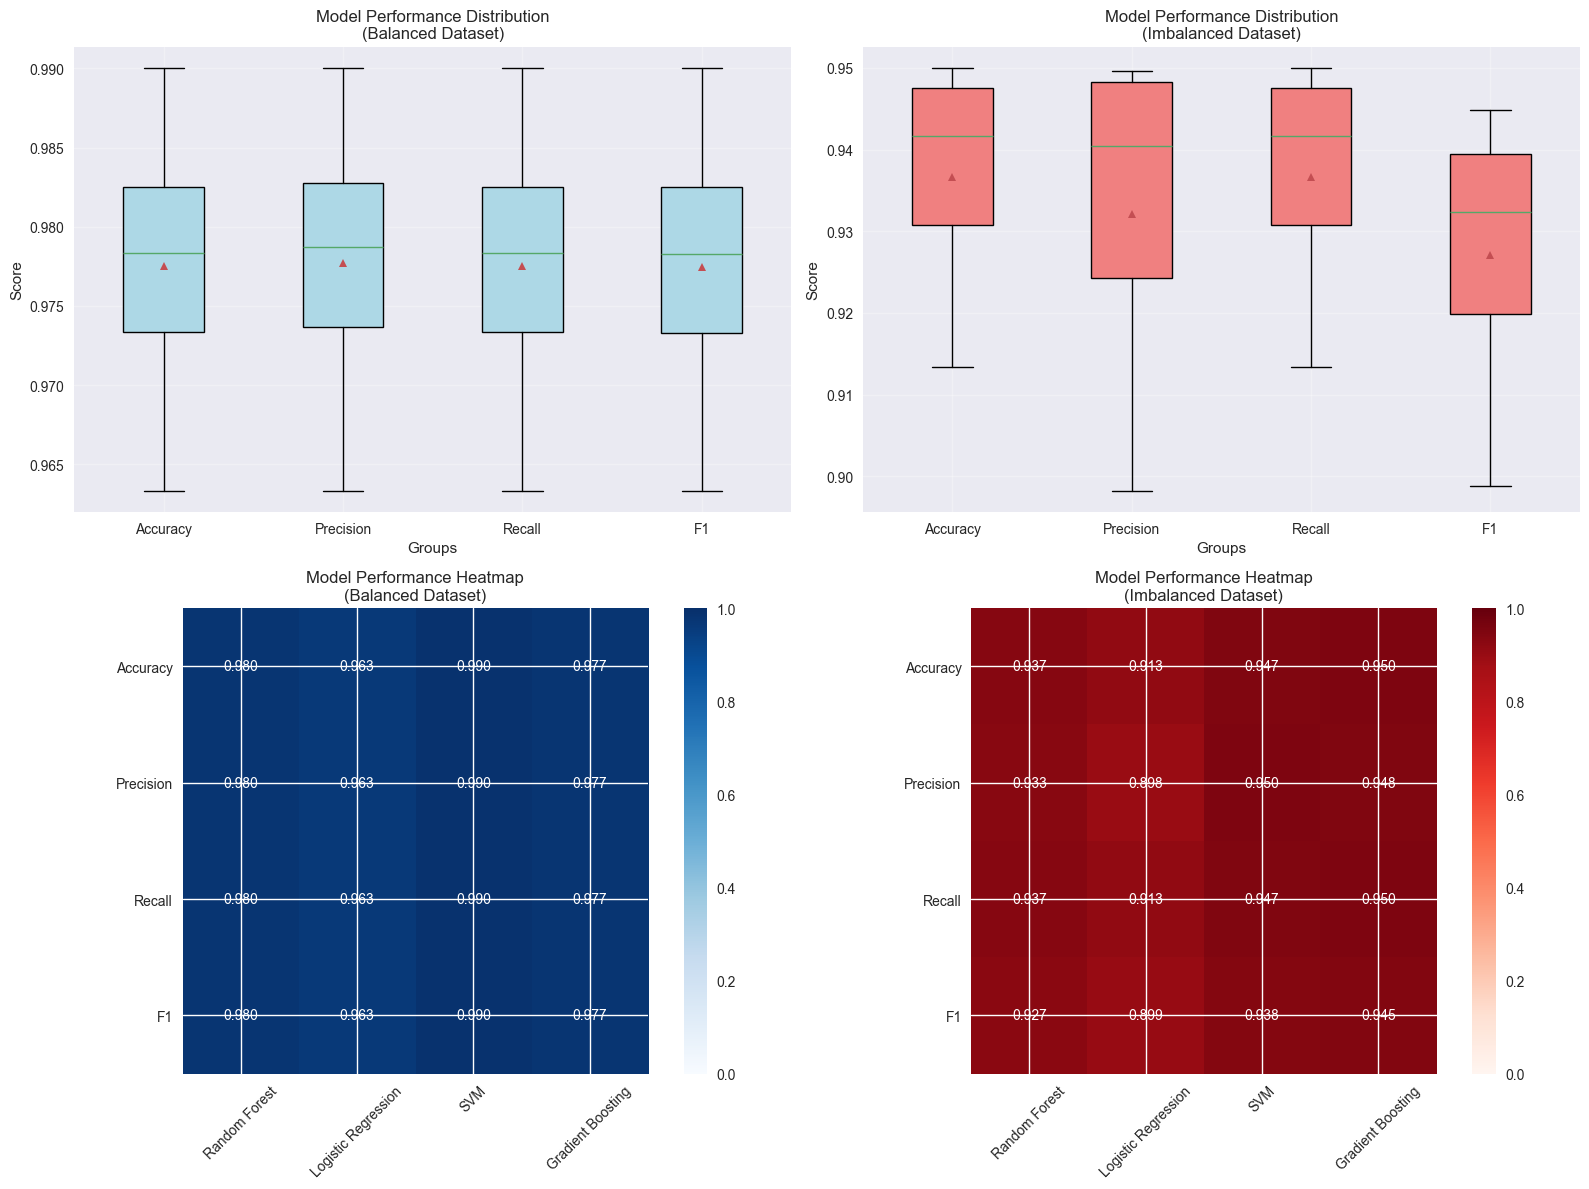


=== BALANCED DATASET RESULTS ===
              Model  Accuracy  Precision  Recall    F1
      Random Forest     0.980      0.980   0.980 0.980
Logistic Regression     0.963      0.963   0.963 0.963
                SVM     0.990      0.990   0.990 0.990
  Gradient Boosting     0.977      0.977   0.977 0.977

=== IMBALANCED DATASET RESULTS ===
              Model  Accuracy  Precision  Recall    F1
      Random Forest     0.937      0.933   0.937 0.927
Logistic Regression     0.913      0.898   0.913 0.899
                SVM     0.947      0.950   0.947 0.938
  Gradient Boosting     0.950      0.948   0.950 0.945


In [7]:
# Evaluate multiple models on multiple metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_models(models, X_train, X_test, y_train, y_test):
    """Evaluate multiple models on various metrics."""
    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': []
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results['Model'].append(name)
        results['Accuracy'].append(accuracy_score(y_test, y_pred))
        results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        results['F1'].append(f1_score(y_test, y_pred, average='weighted'))

    return results


# Evaluate on binary classification
results_bin = evaluate_models(models, X_train_bin, X_test_bin, y_train_bin, y_test_bin)

# Evaluate on imbalanced dataset
results_imbal = evaluate_models(models, X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal)

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plots for metric comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
balanced_data = [results_bin[metric] for metric in metrics]
imbalanced_data = [results_imbal[metric] for metric in metrics]

braintools.visualize.box_plot(balanced_data,
                              labels=metrics,
                              ax=axes[0, 0],
                              title='Model Performance Distribution\n(Balanced Dataset)',
                              ylabel='Score',
                              colors=['lightblue'] * 4)

braintools.visualize.box_plot(imbalanced_data,
                              labels=metrics,
                              ax=axes[0, 1],
                              title='Model Performance Distribution\n(Imbalanced Dataset)',
                              ylabel='Score',
                              colors=['lightcoral'] * 4)

# Performance heatmap using correlation matrix function
import pandas as pd

# Convert results to DataFrame for easier manipulation
df_bin = pd.DataFrame(results_bin)
df_imbal = pd.DataFrame(results_imbal)

# Create performance matrices
perf_matrix_bin = df_bin[metrics].T.values
perf_matrix_imbal = df_imbal[metrics].T.values

# Plot as heatmaps
im1 = axes[1, 0].imshow(perf_matrix_bin, cmap='Blues', vmin=0, vmax=1)
axes[1, 0].set_title('Model Performance Heatmap\n(Balanced Dataset)')
axes[1, 0].set_xticks(range(len(results_bin['Model'])))
axes[1, 0].set_yticks(range(len(metrics)))
axes[1, 0].set_xticklabels(results_bin['Model'], rotation=45)
axes[1, 0].set_yticklabels(metrics)

# Add values to heatmap
for i in range(len(metrics)):
    for j in range(len(results_bin['Model'])):
        axes[1, 0].text(j, i, f'{perf_matrix_bin[i, j]:.3f}',
                        ha='center', va='center', color='white' if perf_matrix_bin[i, j] > 0.5 else 'black')

plt.colorbar(im1, ax=axes[1, 0])

im2 = axes[1, 1].imshow(perf_matrix_imbal, cmap='Reds', vmin=0, vmax=1)
axes[1, 1].set_title('Model Performance Heatmap\n(Imbalanced Dataset)')
axes[1, 1].set_xticks(range(len(results_imbal['Model'])))
axes[1, 1].set_yticks(range(len(metrics)))
axes[1, 1].set_xticklabels(results_imbal['Model'], rotation=45)
axes[1, 1].set_yticklabels(metrics)

# Add values to heatmap
for i in range(len(metrics)):
    for j in range(len(results_imbal['Model'])):
        axes[1, 1].text(j, i, f'{perf_matrix_imbal[i, j]:.3f}',
                        ha='center', va='center', color='white' if perf_matrix_imbal[i, j] > 0.5 else 'black')

plt.colorbar(im2, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Print numerical results
print("\n=== BALANCED DATASET RESULTS ===")
df_bin_display = df_bin.round(3)
print(df_bin_display.to_string(index=False))

print("\n=== IMBALANCED DATASET RESULTS ===")
df_imbal_display = df_imbal.round(3)
print(df_imbal_display.to_string(index=False))

## 7. Statistical Significance Testing Visualization

Let's create visualizations to show statistical significance in model performance comparisons.

Performing cross-validation for statistical analysis...


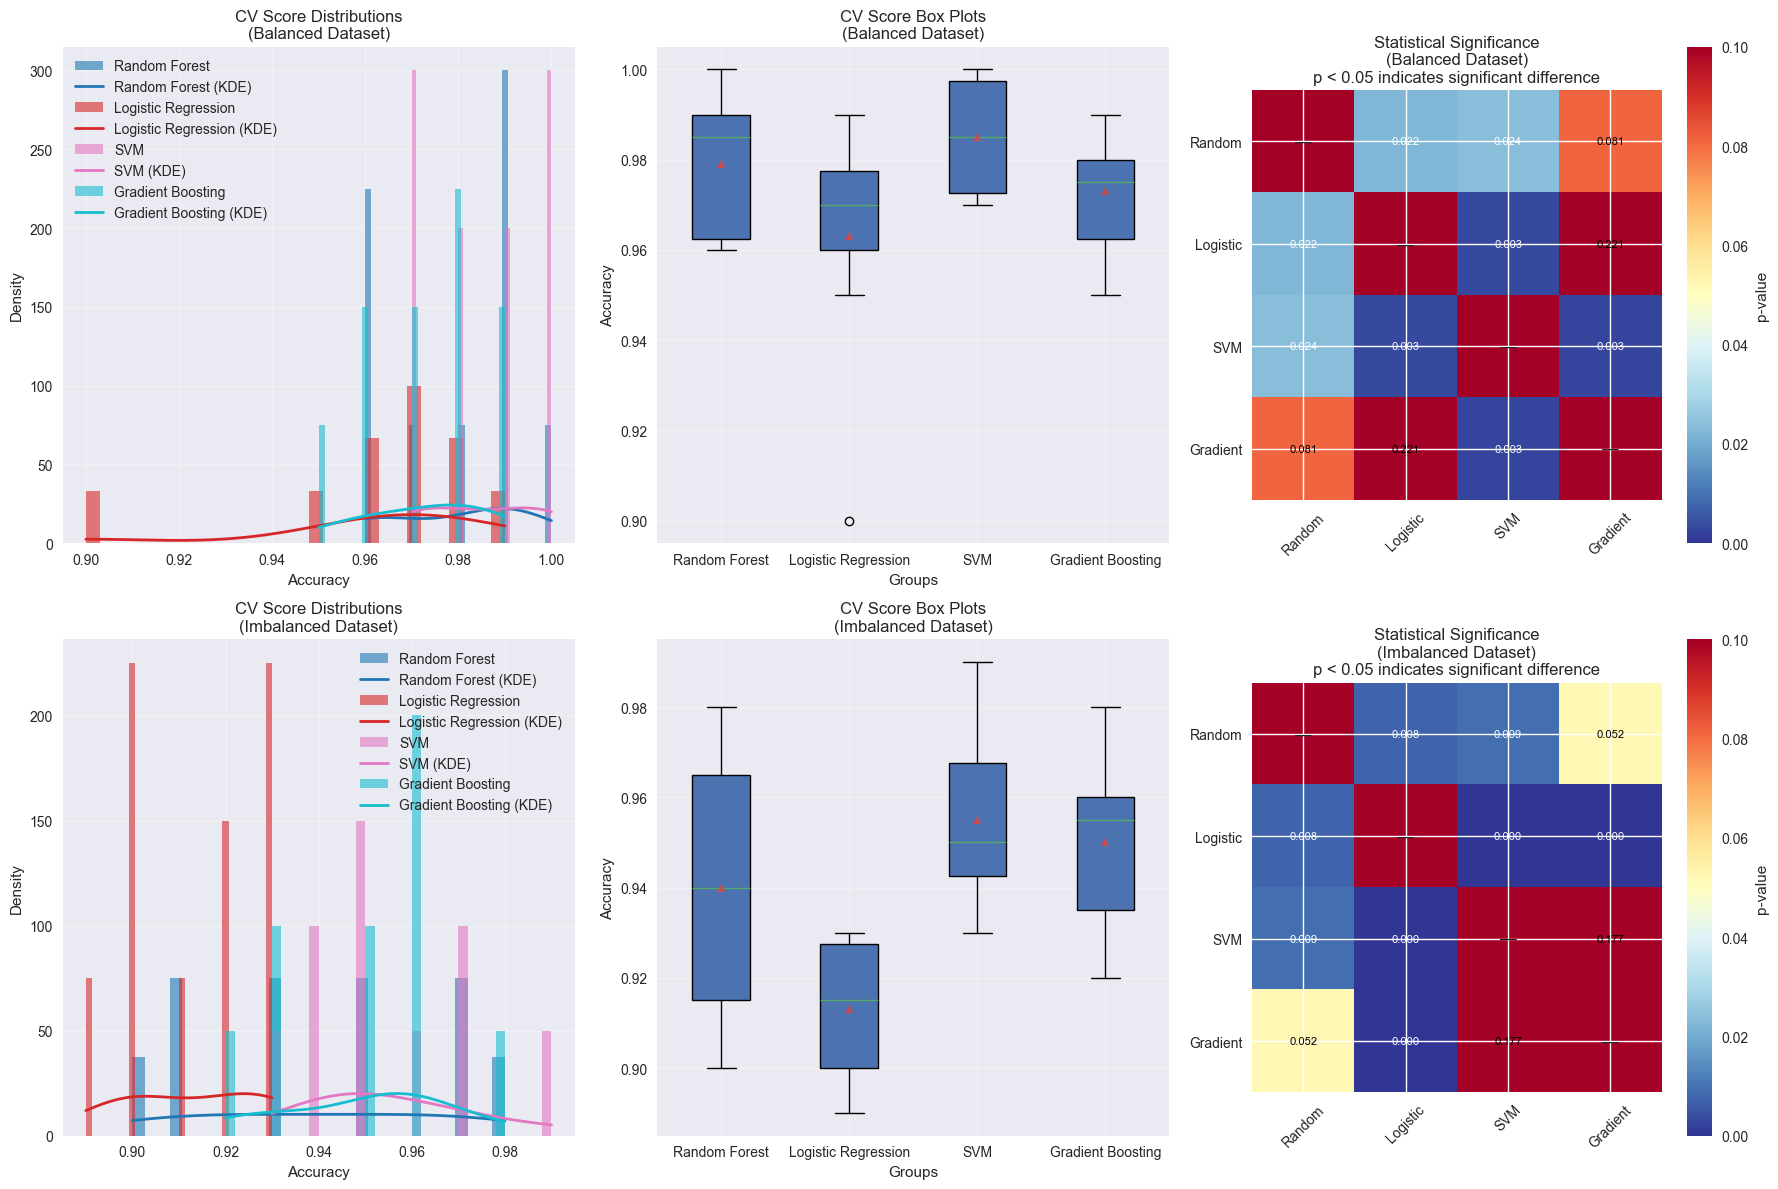


=== CROSS-VALIDATION RESULTS SUMMARY ===

Balanced Dataset:
Random Forest       : 0.979 ± 0.014
Logistic Regression : 0.963 ± 0.024
SVM                 : 0.985 ± 0.012
Gradient Boosting   : 0.973 ± 0.013

Imbalanced Dataset:
Random Forest       : 0.940 ± 0.027
Logistic Regression : 0.913 ± 0.014
SVM                 : 0.955 ± 0.017
Gradient Boosting   : 0.950 ± 0.017

Best model on balanced data: SVM
Best model on imbalanced data: SVM


In [8]:
# Cross-validation for statistical testing
from sklearn.model_selection import cross_val_score


def statistical_model_comparison(models, X, y, cv=10):
    """Perform statistical comparison of models using cross-validation."""
    cv_results = {}

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
        cv_results[name] = scores

    return cv_results


# Get cross-validation results
print("Performing cross-validation for statistical analysis...")
cv_results_bin = statistical_model_comparison(models, X_binary, y_binary)
cv_results_imbal = statistical_model_comparison(models, X_imbal, y_imbal)


# Statistical significance testing
def perform_statistical_tests(cv_results):
    """Perform pairwise statistical tests between models."""
    model_names = list(cv_results.keys())
    n_models = len(model_names)

    # Create p-value matrix
    p_values = np.ones((n_models, n_models))

    for i in range(n_models):
        for j in range(i + 1, n_models):
            # Paired t-test
            t_stat, p_val = stats.ttest_rel(cv_results[model_names[i]],
                                            cv_results[model_names[j]])
            p_values[i, j] = p_val
            p_values[j, i] = p_val

    return p_values, model_names


p_values_bin, model_names = perform_statistical_tests(cv_results_bin)
p_values_imbal, _ = perform_statistical_tests(cv_results_imbal)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution plots for CV scores
cv_data_bin = [cv_results_bin[name] for name in model_names]
cv_data_imbal = [cv_results_imbal[name] for name in model_names]

braintools.visualize.distribution_plot(cv_data_bin,
                                       labels=model_names,
                                       ax=axes[0, 0],
                                       title='CV Score Distributions\n(Balanced Dataset)',
                                       xlabel='Accuracy',
                                       ylabel='Density',
                                       plot_type='both',
                                       alpha=0.6)

braintools.visualize.distribution_plot(cv_data_imbal,
                                       labels=model_names,
                                       ax=axes[1, 0],
                                       title='CV Score Distributions\n(Imbalanced Dataset)',
                                       xlabel='Accuracy',
                                       ylabel='Density',
                                       plot_type='both',
                                       alpha=0.6)

# Box plots for CV scores
braintools.visualize.box_plot(cv_data_bin,
                              labels=model_names,
                              ax=axes[0, 1],
                              title='CV Score Box Plots\n(Balanced Dataset)',
                              ylabel='Accuracy',
                              showmeans=True)

braintools.visualize.box_plot(cv_data_imbal,
                              labels=model_names,
                              ax=axes[1, 1],
                              title='CV Score Box Plots\n(Imbalanced Dataset)',
                              ylabel='Accuracy',
                              showmeans=True)

# P-value heatmaps
im1 = axes[0, 2].imshow(p_values_bin, cmap='RdYlBu_r', vmin=0, vmax=0.1)
axes[0, 2].set_title('Statistical Significance\n(Balanced Dataset)\np < 0.05 indicates significant difference')
axes[0, 2].set_xticks(range(len(model_names)))
axes[0, 2].set_yticks(range(len(model_names)))
axes[0, 2].set_xticklabels([name.split()[0] for name in model_names], rotation=45)
axes[0, 2].set_yticklabels([name.split()[0] for name in model_names])

# Add p-values to heatmap
for i in range(len(model_names)):
    for j in range(len(model_names)):
        if i != j:
            color = 'white' if p_values_bin[i, j] < 0.05 else 'black'
            axes[0, 2].text(j, i, f'{p_values_bin[i, j]:.3f}',
                            ha='center', va='center', color=color, fontsize=8)
        else:
            axes[0, 2].text(j, i, '—', ha='center', va='center', fontsize=12)

plt.colorbar(im1, ax=axes[0, 2], label='p-value')

im2 = axes[1, 2].imshow(p_values_imbal, cmap='RdYlBu_r', vmin=0, vmax=0.1)
axes[1, 2].set_title('Statistical Significance\n(Imbalanced Dataset)\np < 0.05 indicates significant difference')
axes[1, 2].set_xticks(range(len(model_names)))
axes[1, 2].set_yticks(range(len(model_names)))
axes[1, 2].set_xticklabels([name.split()[0] for name in model_names], rotation=45)
axes[1, 2].set_yticklabels([name.split()[0] for name in model_names])

# Add p-values to heatmap
for i in range(len(model_names)):
    for j in range(len(model_names)):
        if i != j:
            color = 'white' if p_values_imbal[i, j] < 0.05 else 'black'
            axes[1, 2].text(j, i, f'{p_values_imbal[i, j]:.3f}',
                            ha='center', va='center', color=color, fontsize=8)
        else:
            axes[1, 2].text(j, i, '—', ha='center', va='center', fontsize=12)

plt.colorbar(im2, ax=axes[1, 2], label='p-value')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== CROSS-VALIDATION RESULTS SUMMARY ===")
print("\nBalanced Dataset:")
for name, scores in cv_results_bin.items():
    print(f"{name:20s}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

print("\nImbalanced Dataset:")
for name, scores in cv_results_imbal.items():
    print(f"{name:20s}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Find best performing models
best_balanced = max(cv_results_bin.keys(), key=lambda k: np.mean(cv_results_bin[k]))
best_imbalanced = max(cv_results_imbal.keys(), key=lambda k: np.mean(cv_results_imbal[k]))

print(f"\nBest model on balanced data: {best_balanced}")
print(f"Best model on imbalanced data: {best_imbalanced}")

## 8. Advanced Visualization: Feature Importance and Model Interpretation

Let's add some advanced visualizations for model interpretation.

Analyzing model complexity...


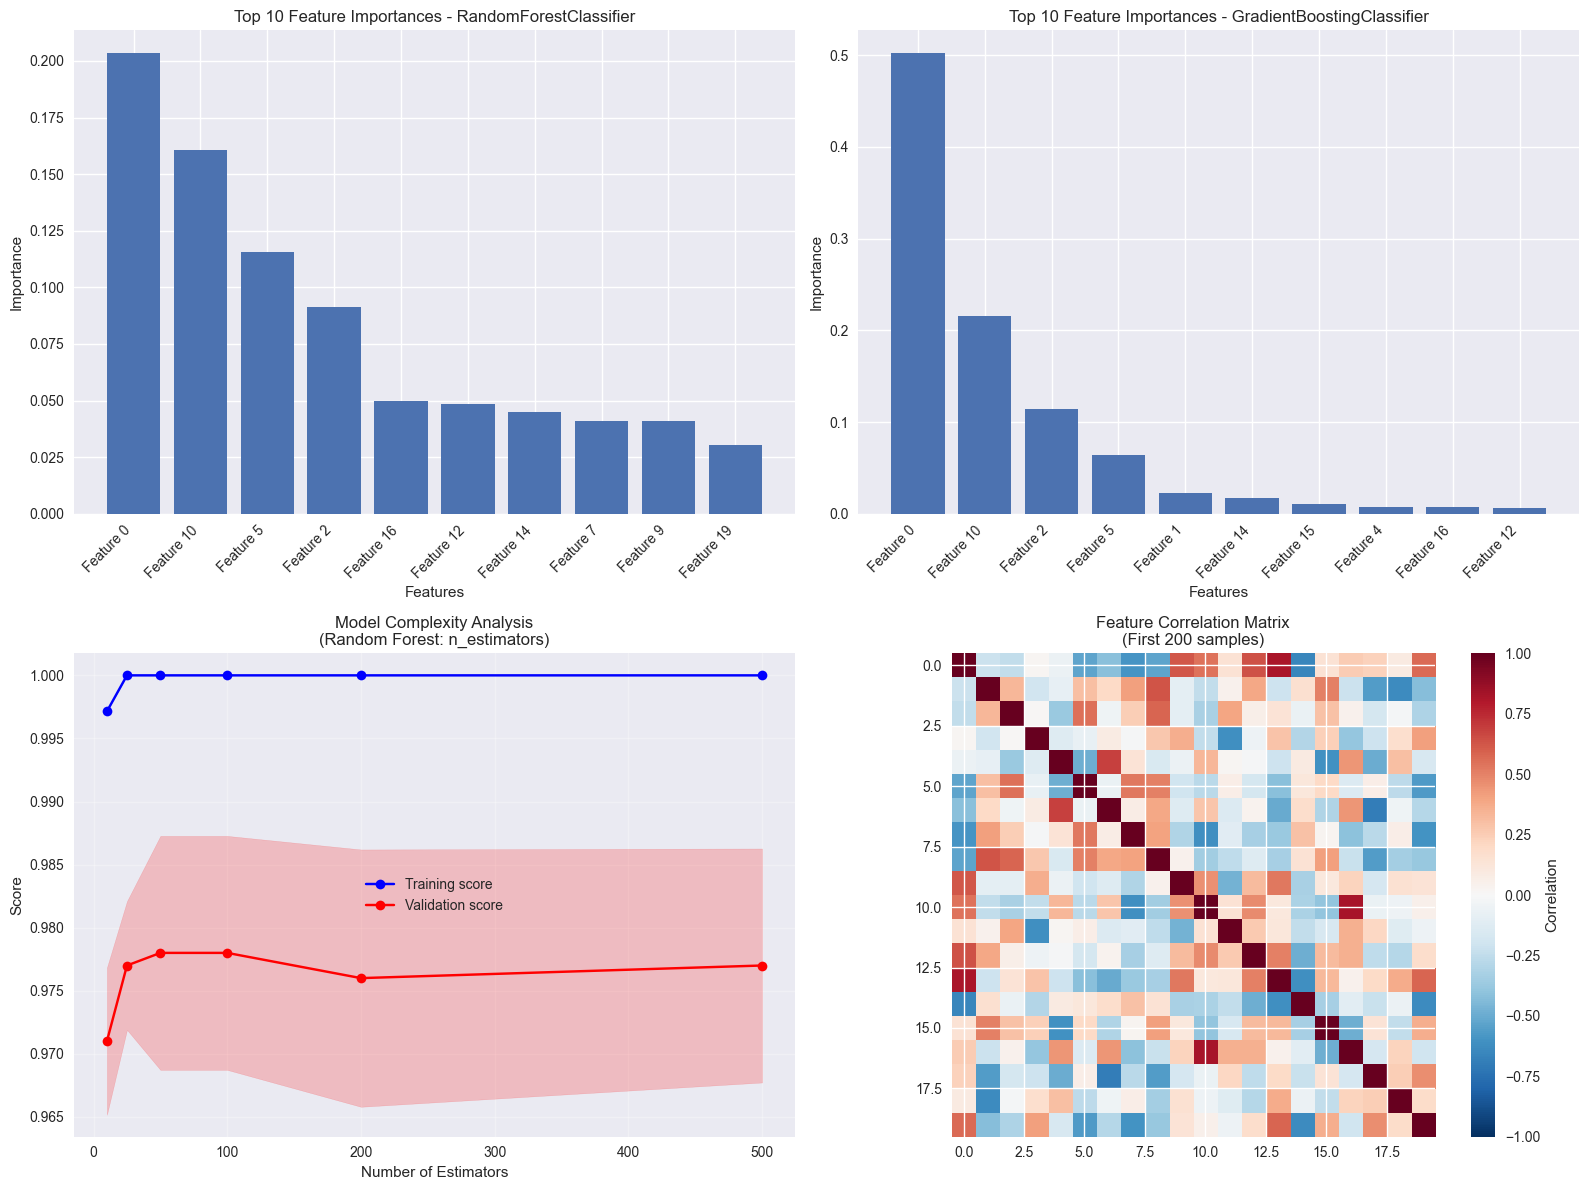

In [9]:
# Feature importance analysis
def plot_feature_importance(model, feature_names=None, top_n=10, ax=None):
    """Plot feature importance for tree-based models."""
    if not hasattr(model, 'feature_importances_'):
        print(f"Model {type(model).__name__} doesn't have feature_importances_ attribute")
        return

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    importance = model.feature_importances_
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(len(importance))]

    # Sort features by importance
    indices = np.argsort(importance)[::-1][:top_n]

    ax.bar(range(len(indices)), importance[indices])
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_title(f'Top {top_n} Feature Importances - {type(model).__name__}')
    ax.set_xticks(range(len(indices)))
    ax.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')

    return ax


# Model complexity analysis
def analyze_model_complexity():
    """Analyze how model complexity affects performance."""
    # Test different Random Forest complexities
    n_estimators_range = [10, 25, 50, 100, 200, 500]
    train_scores = []
    val_scores = []

    for n_est in n_estimators_range:
        rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
        # Use cross-validation to get more reliable estimates
        scores = cross_val_score(rf, X_binary, y_binary, cv=5, scoring='accuracy')
        val_scores.append(scores)

        # Get training scores
        rf.fit(X_train_bin, y_train_bin)
        train_score = rf.score(X_train_bin, y_train_bin)
        train_scores.append([train_score] * 5)  # Replicate for consistency with CV

    return n_estimators_range, np.array(train_scores), np.array(val_scores)


# Create advanced visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Feature importance plots
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bin, y_train_bin)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_bin, y_train_bin)

plot_feature_importance(rf_model, ax=axes[0, 0])
plot_feature_importance(gb_model, ax=axes[0, 1])

# Model complexity analysis
print("Analyzing model complexity...")
complexity_range, train_scores_complex, val_scores_complex = analyze_model_complexity()

# Plot complexity curve
braintools.visualize.learning_curve(np.array(complexity_range),
                                    train_scores_complex,
                                    val_scores_complex,
                                    ax=axes[1, 0],
                                    title='Model Complexity Analysis\n(Random Forest: n_estimators)')
axes[1, 0].set_xlabel('Number of Estimators')

# Feature correlation analysis
braintools.visualize.correlation_matrix(X_binary[:200],
                                        ax=axes[1, 1],
                                        figsize=(8, 6),
                                        title='Feature Correlation Matrix\n(First 200 samples)',
                                        show_values=False)  # Too many features to show values clearly

plt.tight_layout()
plt.show()

## 9. Summary and Best Practices

Let's create a summary visualization that demonstrates best practices for model evaluation.

Creating comprehensive evaluation dashboards...


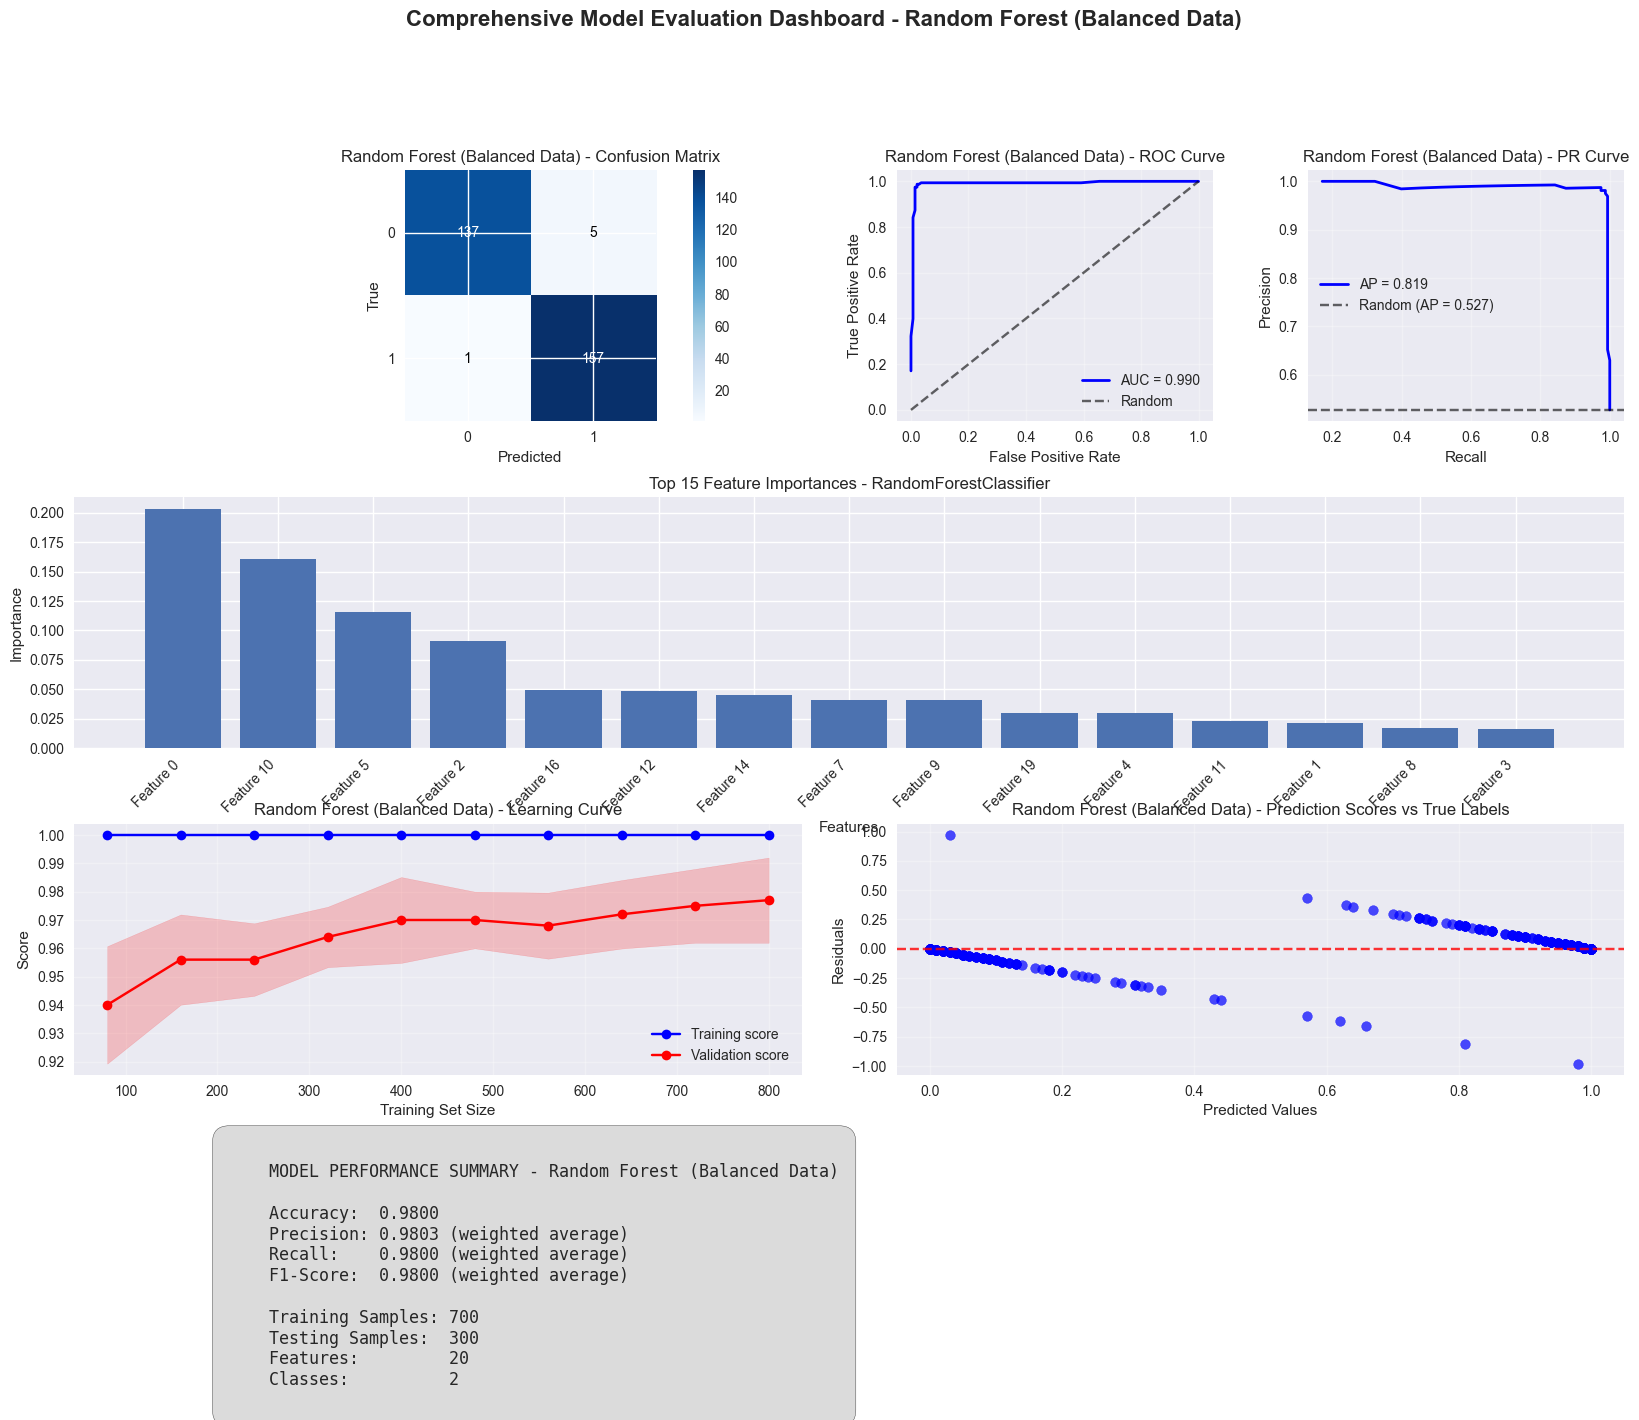

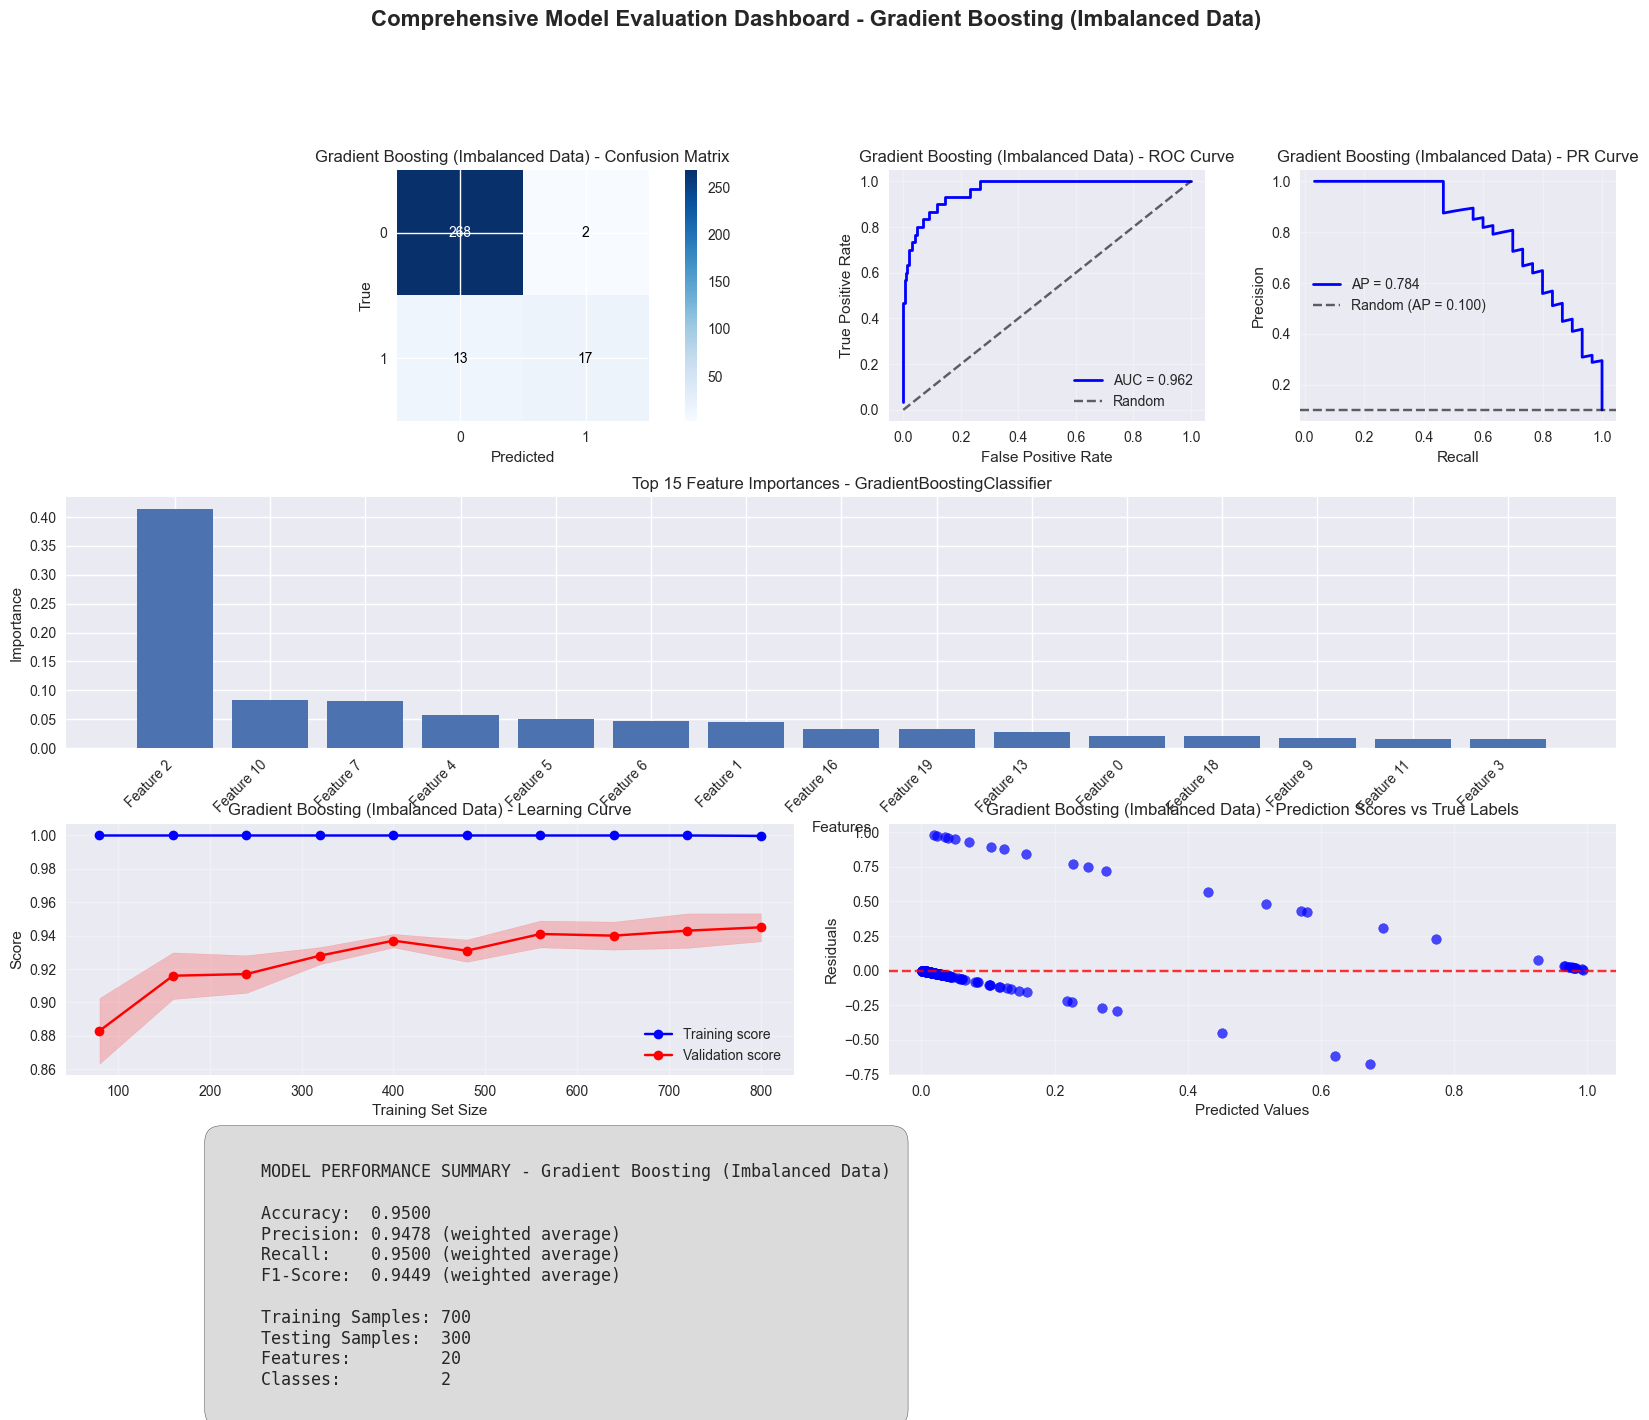

In [10]:
# Create a comprehensive model evaluation dashboard
def create_evaluation_dashboard(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """Create a comprehensive evaluation dashboard for a single model."""
    # Train the model
    model.fit(X_train, y_train)

    # Get predictions
    y_pred = model.predict(X_test)
    y_scores = None
    if hasattr(model, 'predict_proba'):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_scores = model.decision_function(X_test)

    # Create dashboard
    fig = plt.figure(figsize=(20, 16))

    # Create grid layout
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

    # Confusion Matrix
    ax1 = fig.add_subplot(gs[0, 0:2])
    braintools.visualize.confusion_matrix(y_test, y_pred, ax=ax1, title=f'{model_name} - Confusion Matrix')

    # ROC Curve (if binary classification)
    if len(np.unique(y_test)) == 2 and y_scores is not None:
        ax2 = fig.add_subplot(gs[0, 2])
        braintools.visualize.roc_curve(y_test, y_scores, ax=ax2, title=f'{model_name} - ROC Curve')

        # Precision-Recall Curve
        ax3 = fig.add_subplot(gs[0, 3])
        braintools.visualize.precision_recall_curve(y_test, y_scores, ax=ax3, title=f'{model_name} - PR Curve')

    # Feature Importance (if available)
    if hasattr(model, 'feature_importances_'):
        ax4 = fig.add_subplot(gs[1, :])
        plot_feature_importance(model, ax=ax4, top_n=15)

    # Learning Curve
    ax5 = fig.add_subplot(gs[2, 0:2])
    train_sizes_abs, train_scores, val_scores = generate_learning_curve_data(
        model, np.vstack([X_train, X_test]), np.hstack([y_train, y_test])
    )
    braintools.visualize.learning_curve(train_sizes_abs,
                                        train_scores,
                                        val_scores,
                                        ax=ax5,
                                        title=f'{model_name} - Learning Curve')

    # Residual Analysis (for predictions)
    from braintools.visualize import residual_plot
    ax6 = fig.add_subplot(gs[2, 2:4])
    if y_scores is not None:
        residual_plot(y_test.astype(float), y_scores, ax=ax6,
                      title=f'{model_name} - Prediction Scores vs True Labels')
    else:
        # For models without probability scores, show prediction distribution
        braintools.visualize.distribution_plot([y_pred[y_test == 0],
                                                y_pred[y_test == 1]],
                                               labels=['True Class 0', 'True Class 1'],
                                               ax=ax6, title=f'{model_name} - Prediction Distribution')

    # Performance Metrics Summary
    ax7 = fig.add_subplot(gs[3, :])
    ax7.axis('off')

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Create metrics text
    metrics_text = f"""
    MODEL PERFORMANCE SUMMARY - {model_name}
    
    Accuracy:  {accuracy:.4f}
    Precision: {precision:.4f} (weighted average)
    Recall:    {recall:.4f} (weighted average)
    F1-Score:  {f1:.4f} (weighted average)
    
    Training Samples: {len(X_train)}
    Testing Samples:  {len(X_test)}
    Features:         {X_train.shape[1]}
    Classes:          {len(np.unique(y_test))}
    """

    ax7.text(0.1, 0.5, metrics_text, transform=ax7.transAxes, fontsize=12,
             verticalalignment='center', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.8))

    plt.suptitle(f'Comprehensive Model Evaluation Dashboard - {model_name}',
                 fontsize=16, fontweight='bold')

    return fig


# Create dashboards for best performing models
print("Creating comprehensive evaluation dashboards...")

# Random Forest Dashboard
rf_dashboard = create_evaluation_dashboard(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train_bin, X_test_bin, y_train_bin, y_test_bin,
    "Random Forest (Balanced Data)"
)
plt.show()

# Gradient Boosting Dashboard for imbalanced data
gb_dashboard = create_evaluation_dashboard(
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal,
    "Gradient Boosting (Imbalanced Data)"
)
plt.show()

## 10. Key Takeaways and Best Practices

Summary of Model Evaluation Techniques:

1. **Confusion Matrices**: Essential for understanding classification performance across all classes
   - Use normalization to see percentages rather than raw counts
   - Particularly important for imbalanced datasets

2. **ROC Curves**: Great for binary classification, especially when classes are balanced
   - AUC provides a single number summary of performance
   - Less informative for highly imbalanced datasets

3. **Precision-Recall Curves**: Better than ROC for imbalanced datasets
   - Focus on positive class performance
   - Average Precision (AP) is a good summary metric

4. **Learning Curves**: Help diagnose bias vs variance issues
   - Large gap between training and validation → overfitting
   - Both curves plateau at low performance → underfitting

5. **Statistical Significance Testing**: Essential for scientific rigor
   - Use cross-validation for robust performance estimates
   - Perform statistical tests to ensure differences are significant